In [126]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))


In [127]:
#read the file
df1 = pd.read_csv('banknifty_train_csv.csv')
df2 = pd.read_csv('banknifty_test_csv.csv')
df_frame = [df1,df2]
df = pd.concat(df_frame)
#print the head
df.tail()

,Date,Open,High,Low,Close,Volume,Turnover
16,2018-10-25,24841.50,24977.35,24696.85,24817.45,215033794.0,6.855910e+10
17,2018-10-26,24771.85,24771.95,24353.10,24421.05,219130974.0,5.370590e+10
18,2018-10-29,24647.95,25023.75,24404.55,24959.70,279844102.0,8.145830e+10
19,2018-10-30,24924.75,25121.50,24686.85,24807.75,257591034.0,6.320860e+10
20,2018-10-31,24823.80,25201.30,24528.35,25153.25,241789641.0,6.831520e+10


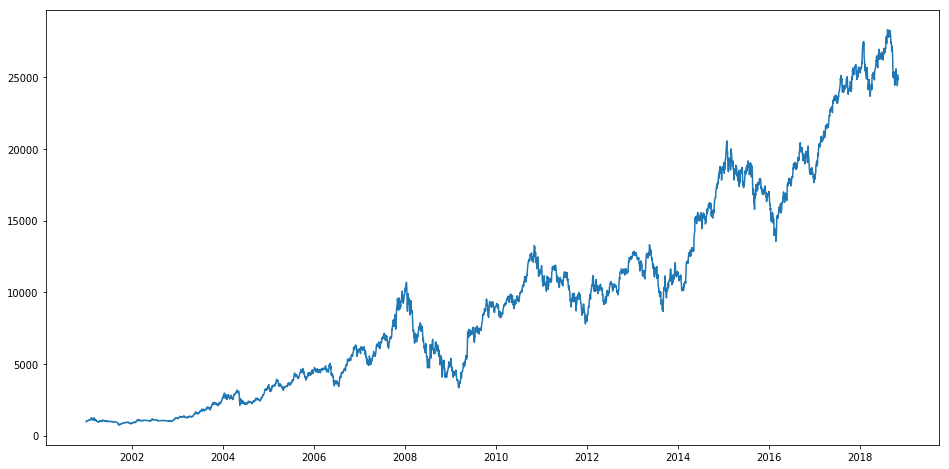

In [128]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [129]:
#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

In [130]:
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

In [131]:



#splitting into train and validation
upto =len(new_data)-80
dataset = new_data.values
print(upto)
train = new_data[:upto]
valid = dataset[upto:,:]
print(type(valid))


4359
<class 'numpy.ndarray'>


In [132]:
new_data.shape, train.shape, valid.shape

((4439, 1), (4359, 1), (80, 1))

In [133]:
inputs = new_data[len(new_data) - len(valid) - 60:].values



In [134]:
inputs.shape

(140, 1)

In [135]:
inputs = inputs.reshape(-1,1)

In [136]:
inputs.shape

(140, 1)

In [137]:
inputs  = scaler.fit_transform(inputs)

/Users/sanjotraibagkar/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [138]:
4359+79-60

4378

In [139]:
4439-4378

61

In [140]:
val = len(new_data) - len(valid)
print(val)
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
    if i ==79:
        print(data[(val+i-60):val+i])
X_test = np.array(X_test)



4359
                 Date      Open      High       Low     Close       Volume  \
Date                                                                         
2018-07-31 2018-07-31  27797.20  27839.20  27651.30  27764.15  185189252.0   
2018-08-01 2018-08-01  27684.80  27820.15  27477.90  27596.60  152825700.0   
2018-08-02 2018-08-02  27469.50  27487.90  27327.95  27355.95  119103729.0   
2018-08-03 2018-08-03  27471.95  27723.00  27448.15  27695.50  164821344.0   
2018-08-06 2018-08-06  27769.55  27994.00  27766.05  27898.50  184016610.0   
2018-08-07 2018-08-07  27972.95  27988.20  27827.30  27875.90  249213872.0   
2018-08-08 2018-08-08  27930.55  28128.65  27858.75  28062.45  149989901.0   
2018-08-09 2018-08-09  28173.65  28363.40  28132.00  28320.00  254180287.0   
2018-08-10 2018-08-10  28348.95  28377.90  28087.65  28124.25  285470698.0   
2018-08-13 2018-08-13  27760.80  27911.85  27739.50  27794.40  165765211.0   
2018-08-14 2018-08-14  27864.40  28053.05  27854.90  28021.

In [141]:
X_test


array([[0.2066582 , 0.17368779, 0.19852781, ..., 0.49837777, 0.46403519,
        0.45731543],
       [0.17368779, 0.19852781, 0.19993844, ..., 0.46403519, 0.45731543,
        0.5162672 ],
       [0.19852781, 0.19993844, 0.23078008, ..., 0.45731543, 0.5162672 ,
        0.53405404],
       ...,
       [0.82415779, 0.87755678, 0.85743598, ..., 0.16495467, 0.1016684 ,
        0.        ],
       [0.87755678, 0.85743598, 0.81446287, ..., 0.1016684 , 0.        ,
        0.13815258],
       [0.85743598, 0.81446287, 0.75274112, ..., 0.        , 0.13815258,
        0.09918055]])

In [142]:
X_test.shape

(80, 60)

In [143]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [144]:
X_test.shape

(80, 60, 1)

In [145]:
from keras.models import model_from_json
import os
symbol = "BANKNIFTY_15"
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
## load weights into new model
loaded_model.load_weights(symbol+".h5")
print("Loaded model from disk")
# 
## evaluate loaded model on test data
loaded_model.compile(optimizer = 'adam', loss = 'mean_squared_error')
#
score = loaded_model.predict(X_test)
print(score)
score = scaler.inverse_transform(score)
print(score)

Loaded model from disk
[[0.5008917 ]
 [0.5005373 ]
 [0.50838584]
 [0.5172717 ]
 [0.5377662 ]
 [0.56479377]
 [0.58465594]
 [0.6087128 ]
 [0.62422013]
 [0.6212842 ]
 [0.629277  ]
 [0.63190156]
 [0.6281212 ]
 [0.6271256 ]
 [0.63357323]
 [0.63928074]
 [0.6466075 ]
 [0.67139447]
 [0.7072964 ]
 [0.749349  ]
 [0.78021497]
 [0.7930877 ]
 [0.7860266 ]
 [0.7909833 ]
 [0.8070898 ]
 [0.82178724]
 [0.8423747 ]
 [0.8723539 ]
 [0.88849443]
 [0.8818481 ]
 [0.8814576 ]
 [0.8721434 ]
 [0.87744915]
 [0.8919306 ]
 [0.9051766 ]
 [0.9043882 ]
 [0.8909542 ]
 [0.8975829 ]
 [0.90732884]
 [0.9142071 ]
 [0.913182  ]
 [0.90834033]
 [0.8915526 ]
 [0.85646605]
 [0.82109046]
 [0.79684234]
 [0.7813209 ]
 [0.7583392 ]
 [0.7194174 ]
 [0.6845182 ]
 [0.67435235]
 [0.65688884]
 [0.6233765 ]
 [0.58381903]
 [0.51689285]
 [0.4243284 ]
 [0.3568605 ]
 [0.31227842]
 [0.26920846]
 [0.2390902 ]
 [0.23145866]
 [0.22017616]
 [0.19832861]
 [0.15918103]
 [0.12848708]
 [0.10246323]
 [0.11997106]
 [0.12706494]
 [0.15764993]
 [0.191692 

In [146]:
score.shape

(80, 1)

In [147]:
valid.shape

(80, 1)

In [174]:
valid = new_data[upto:]


In [175]:
valid.shape

(80, 1)

In [177]:
valid['Predictions'] =0
valid['Predictions'] = score
type(valid)
valid

/Users/sanjotraibagkar/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/sanjotraibagkar/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Close,Predictions
Date,,
2018-07-04,26434,26374.001953
2018-07-05,26503.3,26372.621094
2018-07-06,26493.8,26403.220703
2018-07-09,26753.3,26437.865234
2018-07-10,26894.5,26517.775391
2018-07-11,26816.2,26623.152344
2018-07-12,27026.5,26700.593750
2018-07-13,26936,26794.390625
2018-07-16,26679.8,26854.853516


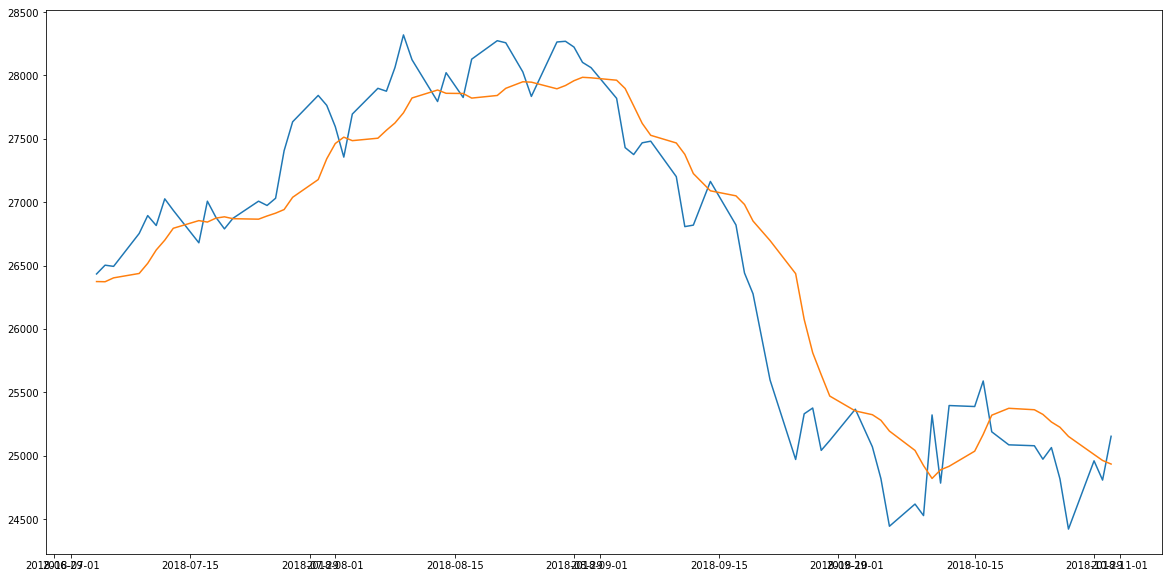

In [178]:
#plt.plot(train['Close'])
plt.plot(valid['Close'], label = "Close")
plt.plot(valid['Predictions'], label = "Prediction")
plt.show()

In [181]:
import numpy as np
date = np.array('2018-11-01', dtype=np.datetime64)
date
date12 =date + np.arange(15)
date12
one1 = np.reshape(date12, (date12.shape[0]),1)
test_df = pd.DataFrame(index = one1)
valid = valid.append(test_df)
valid = valid[15:]

valid['Predictions'] = score
valid

/Users/sanjotraibagkar/anaconda/envs/py36/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,Close,Predictions
2018-09-07,27481.5,26374.001953
2018-09-10,27201.8,26372.621094
2018-09-11,26807.5,26403.220703
2018-09-12,26819.2,26437.865234
2018-09-14,27163.8,26517.775391
2018-09-17,26820.3,26623.152344
2018-09-18,26441.5,26700.593750
2018-09-19,26277.3,26794.390625
2018-09-21,25596.9,26854.853516
2018-09-24,24970.3,26843.404297


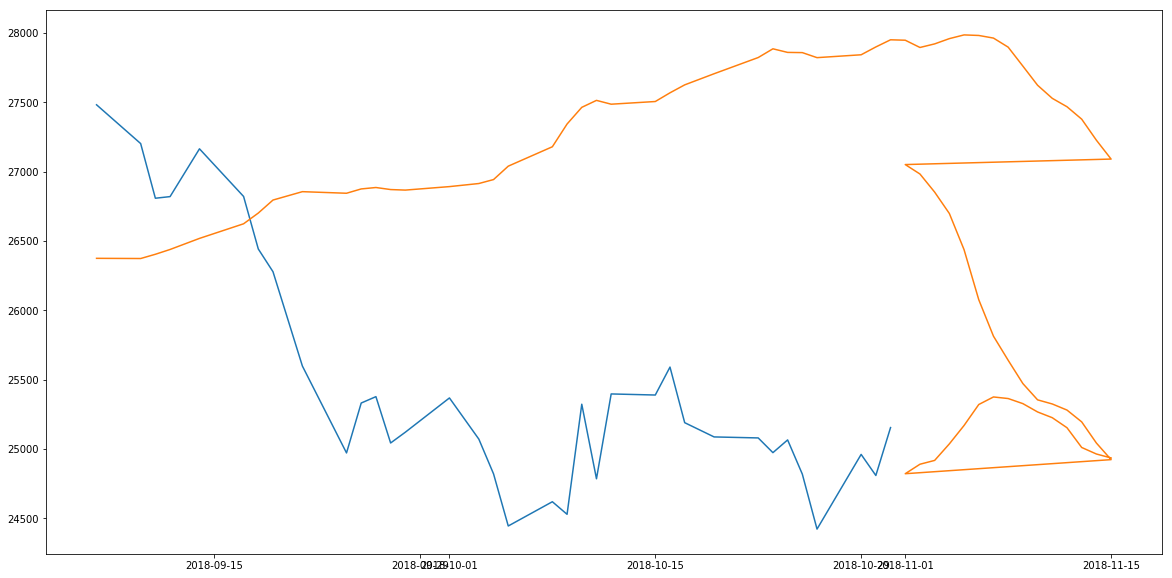

In [182]:
#plt.plot(train['Close'])
plt.plot(valid['Close'], label = "Close")
plt.plot(valid['Predictions'], label = "Prediction")
plt.show()

/Users/sanjotraibagkar/anaconda/envs/py36/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,Close,Predictions
2018-08-16,27826.5,27857.810547
2018-08-17,28128.5,27821.492188
2018-08-20,28274.2,27842.179688
2018-08-21,28257.9,27898.642578
2018-08-23,28027.9,27950.289062
2018-08-24,27834.7,27947.214844
2018-08-27,28264.2,27894.835938
2018-08-28,28269.7,27920.681641
2018-08-29,28224.1,27958.681641
2018-08-30,28103.2,27985.498047
